<a href="https://colab.research.google.com/github/QuangHPV/sc1015-project/blob/main/Logistic_Regression_Weather_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Weather_AUS dataset

In this notebook, We will try Logistic Regression for predicting `RainTomorrow` in Australia. As we have two ways to clean data, one way is mannually by removing outliers, one we use machine learning to remove outliers and fill in missing data, we will, steps by steps, look into how our model apply to solve the problem


## Load the dataset

In [1]:
!git clone https://github.com/QuangHPV/sc1015-project.git

Cloning into 'sc1015-project'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 37 (delta 5), reused 24 (delta 2), pack-reused 0
Receiving objects: 100% (37/37), 10.40 MiB | 3.57 MiB/s, done.
Resolving deltas: 100% (5/5), done.


## Import libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Import specific model
from sklearn.linear_model import LogisticRegression

# Preprocess

In [3]:
df = pd.read_csv('/content/sc1015-project/data/weather_AUS_manually.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0
1,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0
2,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0
3,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,0
4,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,0


In [4]:
df.shape

(51448, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51448 entries, 0 to 51447
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           51448 non-null  object 
 1   Location       51448 non-null  object 
 2   MinTemp        51448 non-null  float64
 3   MaxTemp        51448 non-null  float64
 4   Rainfall       51448 non-null  float64
 5   Evaporation    51448 non-null  float64
 6   Sunshine       51448 non-null  float64
 7   WindGustDir    51448 non-null  object 
 8   WindGustSpeed  51448 non-null  float64
 9   WindDir9am     51448 non-null  object 
 10  WindDir3pm     51448 non-null  object 
 11  WindSpeed9am   51448 non-null  float64
 12  WindSpeed3pm   51448 non-null  float64
 13  Humidity9am    51448 non-null  float64
 14  Humidity3pm    51448 non-null  float64
 15  Pressure9am    51448 non-null  float64
 16  Pressure3pm    51448 non-null  float64
 17  Cloud9am       51448 non-null  float64
 18  Cloud3

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000,51448.000000
mean,13.347007,23.959995,2.080508,5.123239,7.705380,39.034015,14.756434,19.037844,67.476423,50.721000,1017.742958,1015.281037,4.269340,4.324813,17.993665,22.488833,0.213322
std,6.430241,6.643741,6.872158,2.996949,3.735709,11.131999,7.249638,7.649497,16.738453,19.200456,6.440208,6.445897,2.785322,2.638424,6.425017,6.504856,0.409657
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,22.000000,2.000000,999.700000,996.900000,0.000000,0.000000,-0.700000,3.700000,0.000000
25%,8.400000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,57.000000,37.000000,1013.200000,1010.600000,1.000000,2.000000,13.000000,17.400000,0.000000
50%,13.100000,23.700000,0.000000,4.800000,8.600000,37.000000,13.000000,19.000000,68.000000,51.000000,1017.600000,1015.100000,5.000000,5.000000,17.600000,22.300000,0.000000
75%,18.300000,29.300000,0.600000,7.200000,10.700000,46.000000,19.000000,24.000000,80.000000,63.000000,1022.100000,1019.800000,7.000000,7.000000,23.000000,27.500000,0.000000
max,29.700000,44.400000,206.200000,14.300000,14.500000,72.000000,35.000000,39.000000,100.000000,100.000000,1035.700000,1033.600000,8.000000,9.000000,37.200000,42.600000,1.000000


We need to label categorical data. Moreover, we will delete the data col, as we do not work for time-series.

In [10]:
object_cols = ['Location',
                'WindGustDir',
                'WindDir9am',
                'WindDir3pm',
                'RainToday',
                'RainTomorrow',
               'Cloud9am',
               'Cloud3pm',
               'RainToday']
# Initialize the LabelEncoder


def encode_categorical_columns_label_encoding(df, columns_to_encode):
    """
    Applies Label Encoding to specified categorical columns in the DataFrame,
    retains all other columns unchanged, and prints the mapping from original
    categorical values to encoded numeric codes.

    Parameters:
    - df: pandas DataFrame containing the columns to encode.
    - columns_to_encode: list of strings, names of the categorical columns to be encoded.

    Returns:
    - A new DataFrame with specified columns label encoded and all other columns unchanged.
    """
    # Copy the DataFrame to avoid modifying the original data
    encoded_df = df.copy()

    # Initialize LabelEncoder
    encoder = LabelEncoder()

    # Loop through each column to encode
    for column in columns_to_encode:
        # Apply LabelEncoder and replace the column in the DataFrame
        encoded_df[column] = encoder.fit_transform(df[column])

        # Print the mappings for each encoded column
        mappings = {index: label for index, label in enumerate(encoder.classes_)}
        print(f"Encoding mapping for '{column}': {mappings}")

    return encoded_df

encoded_df = encode_categorical_columns_label_encoding(df, object_cols)

Encoding mapping for 'Location': {0: 'AliceSprings', 1: 'Brisbane', 2: 'Cairns', 3: 'Canberra', 4: 'Cobar', 5: 'CoffsHarbour', 6: 'Darwin', 7: 'Hobart', 8: 'Melbourne', 9: 'MelbourneAirport', 10: 'Mildura', 11: 'Moree', 12: 'MountGambier', 13: 'NorfolkIsland', 14: 'Nuriootpa', 15: 'Perth', 16: 'PerthAirport', 17: 'Portland', 18: 'Sale', 19: 'Sydney', 20: 'SydneyAirport', 21: 'Townsville', 22: 'WaggaWagga', 23: 'Watsonia', 24: 'Williamtown', 25: 'Woomera'}
Encoding mapping for 'WindGustDir': {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
Encoding mapping for 'WindDir9am': {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
Encoding mapping for 'WindDir3pm': {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 

In [13]:
encoded_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-04,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,42.0,22.0,1012.3,1009.2,1,6,28.7,34.9,0,0
1,2009-01-05,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,37.0,22.0,1012.7,1009.1,1,5,29.1,35.6,0,0
2,2009-01-07,4,27.1,36.1,0.0,13.0,0.0,3,43.0,3,...,26.0,19.0,1007.7,1007.4,8,8,30.7,34.3,0,0
3,2009-01-08,4,23.3,34.0,0.0,9.8,12.6,11,41.0,8,...,33.0,15.0,1011.3,1009.9,3,1,25.0,31.5,0,0
4,2009-01-10,4,19.0,35.5,0.0,12.0,12.3,1,48.0,1,...,46.0,28.0,1008.3,1004.0,1,5,23.4,33.3,0,0


In [18]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51448 entries, 0 to 51447
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           51448 non-null  object 
 1   Location       51448 non-null  int64  
 2   MinTemp        51448 non-null  float64
 3   MaxTemp        51448 non-null  float64
 4   Rainfall       51448 non-null  float64
 5   Evaporation    51448 non-null  float64
 6   Sunshine       51448 non-null  float64
 7   WindGustDir    51448 non-null  int64  
 8   WindGustSpeed  51448 non-null  float64
 9   WindDir9am     51448 non-null  int64  
 10  WindDir3pm     51448 non-null  int64  
 11  WindSpeed9am   51448 non-null  float64
 12  WindSpeed3pm   51448 non-null  float64
 13  Humidity9am    51448 non-null  float64
 14  Humidity3pm    51448 non-null  float64
 15  Pressure9am    51448 non-null  float64
 16  Pressure3pm    51448 non-null  float64
 17  Cloud9am       51448 non-null  int64  
 18  Cloud3

# Problem Solving
From the numerical dataset, I will create a Logistic Regression Model for predicting whether today is raining or not. The Model is trying to do the binary classfy whether today is raining or not, by fitting a curved line to the dataset  

For better prediction, I will use Standard Scaler to Normalize data, make the model easier to learn from our cleaned numerical dataset

### Using manually cleaned dataset

In [24]:
X = encoded_df.drop(['Date', 'RainTomorrow'], axis=1)
y = encoded_df['RainTomorrow']
print('Len of X', len(X))
print('Len of y', len(y))

Len of X 51448
Len of y 51448


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predictions for using all features

In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Evaluating

To evaluate our model, I will use the accuracy score to evaluate it. Then I also use Confusion matrix to evaluate, and give some insights about our result

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8527696793002916

As our data has been cleanned quite well, the accuracy for the model logistic regression is really good, eventhough the capcacity of logistic regression is not really high.

Then, I will use confusion matrix to see which part of our model is weak.

In [30]:
# utils for visualization
def visualize_preds(y_true, y_pred, title):
    ls = []
    f = plt.figure(figsize = (8,8))
    cf = confusion_matrix(y_true, y_pred)
    sns.heatmap(cf, fmt='.0f', annot=True)

    accuracy  = np.trace(cf) / float(np.sum(cf))

    # Metrics for Binary Confusion Matrices
    if sum(cf[:,1]) == 0:
        precision = 0.0;
    else:
        precision = cf[1,1] / sum(cf[:,1])

    if sum(cf[1,:]) == 0:
        recall = 0.0;
    else:
        recall = cf[1,1] / sum(cf[1,:])

    if (precision + recall) == 0:
        f1_score = 0.0;
    else:
        f1_score  = 2 *precision * recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy,precision,recall,f1_score)

    ls.append(accuracy)
    ls.append(precision)
    ls.append(recall)
    ls.append(f1_score)
    ls = pd.DataFrame(ls)


    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)


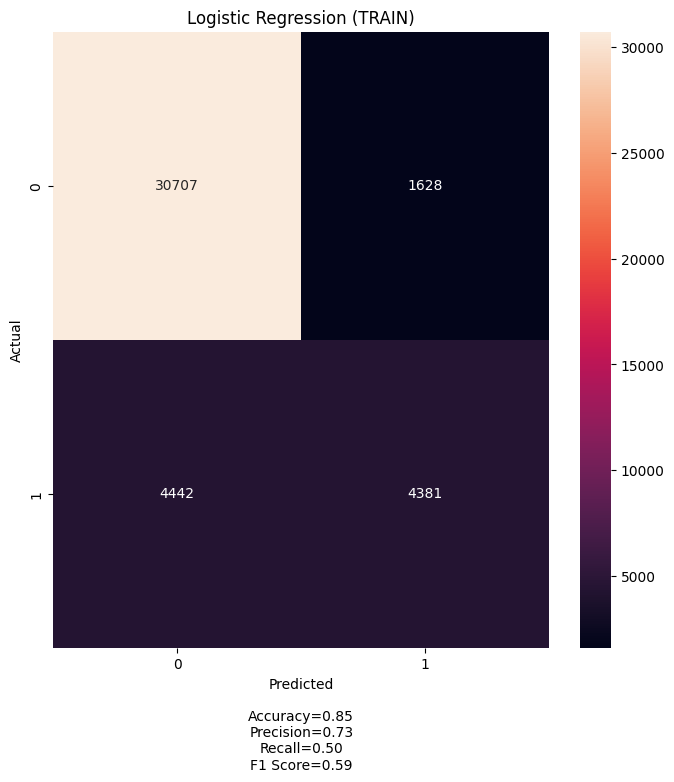

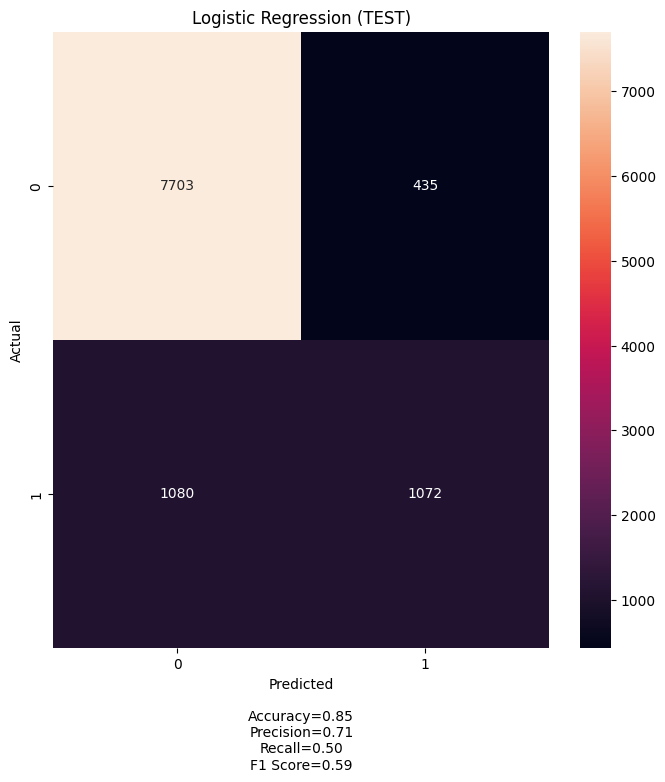

In [31]:
#Predict the data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Visualizing the data
visualize_preds(y_train,y_train_pred, title = 'Logistic Regression (TRAIN)')
visualize_preds(y_test,y_test_pred, title = 'Logistic Regression (TEST)')


From observation, our logistic regression model has many False Negative and False Positive, in both test set and train set. However, the F1 Score is still acceptable, as the model capacity is not really strong

### Using machine learning algorithm cleaned dataset

In [40]:
df = pd.read_csv('/content/sc1015-project/data/weatherAUS_knn_impuation.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,3.84,7.76,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.04,9.82,14,44.0,6,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,4.52,9.50,15,46.0,13,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,3.52,8.54,4,24.0,9,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,4.44,10.46,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [49]:
X = df.drop(['Date', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']
print('Len of X', len(X))
print('Len of y', len(y))

Len of X 145460
Len of y 145460


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predictions

In [53]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Evaluation

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8403341124707824

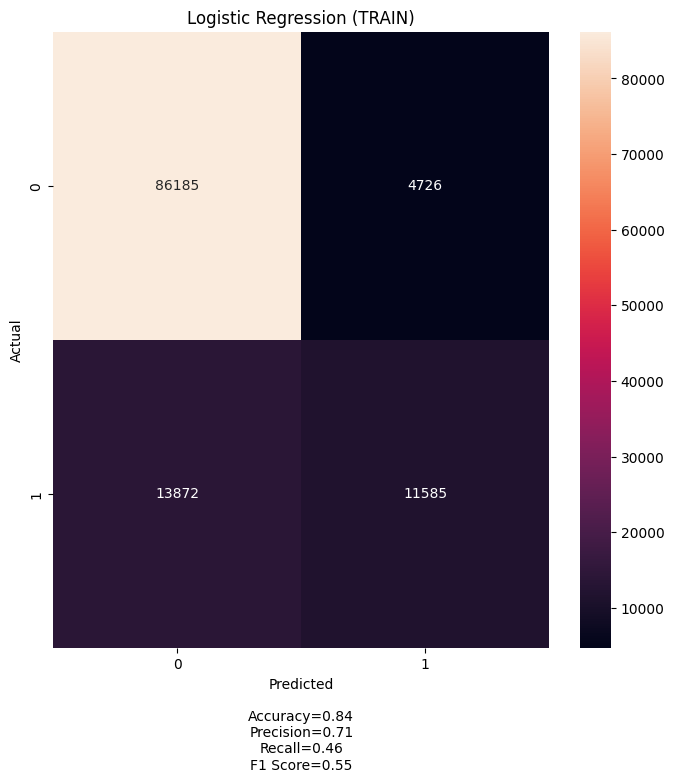

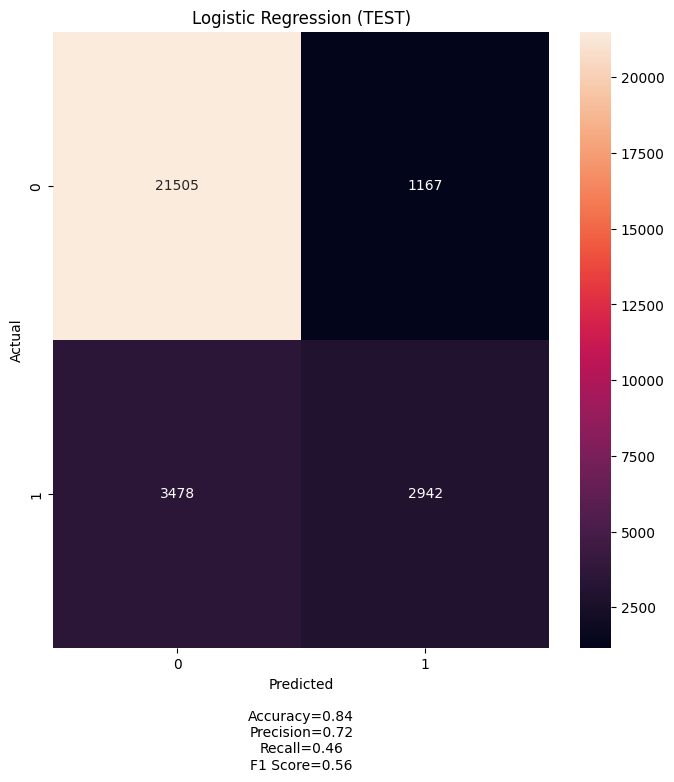

In [55]:
#Predict the data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Visualizing the data
visualize_preds(y_train,y_train_pred, title = 'Logistic Regression (TRAIN)')
visualize_preds(y_test,y_test_pred, title = 'Logistic Regression (TEST)')